<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Build a Sentiment Analysis Classifier

---

# Objective
In this lab, you will use **CountVectorizer** and **TF-IDF** in a classification model to predict customer star ratings based on their reviews of a product. (This will serve as proxy for sentiment analysis.)
1. Process review text using both CountVectorizer and TF-IDF
2. Build a logistic regression model to predict sentiment
3. Compare the performance of both approaches 

# Scenario 
You are an analyst for a marketing company that has just launched a new product suite of mobile devices. You have data from product reviews of one of these new products, the **TechWave X1**. For this lab you will use the text and star ratings from the reviews to predict customer sentiment. 

# Dataset
- The Reviews data set (`reviews.csv` in `./data/reviews.csv`) is a small sample of reviews created for this Lab


## Step 1: Import Libraries

In [1]:
# import numpy, pandas, CountVectorizer, TfidfVectorizer, and the modules from scikit-learn that you need to run a Logistic Regression model.

# Core
import numpy as np
import pandas as pd

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# code to avoid truncation of the output below 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 2: Load and Preprocess the Data

Use **CountVectorizer** and/or **TF-IDF** to predict the start rating of the reviews for the TechWave X1.

- First import the full data set from `reviews.csv` (`../data/reviews.csv`).
- Then convert the star rating into a binary outcome (0/1) to approximate sentiment analysis.

#### Read in the data and convert the `rating` feature to a numeric

In [4]:
# Load dataset
df = pd.read_csv("./data/reviews.csv")

# Quick check
print(df.head())
print(df.info())

         date                                             review  rating  \
0  2024-01-01  Absolutely love the 48MP main camera and HDR s...       5   
1  2024-01-01  Major disappointment. Constant heating issues ...       2   
2  2024-01-02  The optical stabilization and 4K video recordi...       3   
3  2024-01-02  Cannot recommend this device. Poor RAM managem...       1   
4  2024-01-03  Outstanding performance for daily tasks. The 5...       5   

       product  
0  TechWave X1  
1  TechWave X1  
2  TechWave X1  
3  TechWave X1  
4  TechWave X1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     220 non-null    object
 1   review   220 non-null    object
 2   rating   220 non-null    int64 
 3   product  220 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.0+ KB
None


#### Create outcome variable from rating 

You will convert the 5-star rating into a proxy for sentiment where star ratings:  
- 1-3: Negative (0)
- 4-5: Positive (1)

Do this with a lambda function and `.apply()` and create a new sentiment column that will be used as the outcome in our model. 

In [6]:
# Convert 5-star ratings to binary sentiment
# 1-3: Negative (0), 4-5: Positive (1)
df = df[df['rating'] != 3]  # remove neutral reviews
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

/var/folders/vy/d7fzh47529nf8x_dsn55g6580000gn/T/ipykernel_22003/1050460144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


In [7]:
# Confirm conversion
print(df['sentiment'].value_counts())

sentiment
1    181
0     25
Name: count, dtype: int64


#### Create a training and test data set 

In [8]:
# Split the data into training and testing sets

# Features and target
X = df['review']      # review text
y = df['sentiment']   # binary sentiment

# TTS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 164
Testing samples: 42


#### Process the text with CountVectorizer

In [9]:
# Initialize a CountVectorizer, fit and transform the training data, and transform the testing data
count_vect = CountVectorizer(stop_words='english')

In [10]:
# Fit and transform the training data
X_train_count = count_vect.fit_transform(X_train)


In [11]:
# Transform the testing data
X_test_count = count_vect.transform(X_test)

print("Train shape:", X_train_count.shape)
print("Test shape:", X_test_count.shape)

Train shape: (164, 446)
Test shape: (42, 446)


## Step 3: Build a logistic model to predict sentiment using the processed review text

Build a logistic regression model using the words as features to predict sentiment/ratings.

Checkout the [scikit-learn logistic regression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you need a reminder of how to create a **Logistic Regression** model.


##### Hint!
```python
# Initialize a Logistic Regression model
model = LogisticRegression()
```

In [12]:
# Initialize a Logistic Regression model, train the model, predict the ratings, evaluate the model using accuracy, and show the confusion matrix.
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Train the model on the transformed training data
log_reg.fit(X_train_count, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
# Predict the ratings for the testing data
y_pred_count = log_reg.predict(X_test_count)

In [15]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Display the confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("\nClassification Report:\n", classification_report(y_test, y_pred_count))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_count))

Accuracy: 0.8809523809523809

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.94        37

    accuracy                           0.88        42
   macro avg       0.44      0.50      0.47        42
weighted avg       0.78      0.88      0.83        42


Confusion Matrix:
 [[ 0  5]
 [ 0 37]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

#### Repeat the process with TF-IDF.  Process the text with TF-IDF

In [18]:
# Initialize TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english')

In [19]:
# Fit and transform the training data
X_train_tfidf = tfidf_vect.fit_transform(X_train)

In [20]:
# Transform the testing data
X_test_tfidf = tfidf_vect.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

Train shape: (164, 446)
Test shape: (42, 446)


#### Build a Logistic Regression model with TF-IDF processed text

In [21]:
# Initialize a Logistic Regression model
log_reg_tfidf = LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Train the model on the transformed training data
log_reg_tfidf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
# Predict the ratings for the testing data
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

In [24]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))

Accuracy: 0.8809523809523809

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.94        37

    accuracy                           0.88        42
   macro avg       0.44      0.50      0.47        42
weighted avg       0.78      0.88      0.83        42


Confusion Matrix:
 [[ 0  5]
 [ 0 37]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

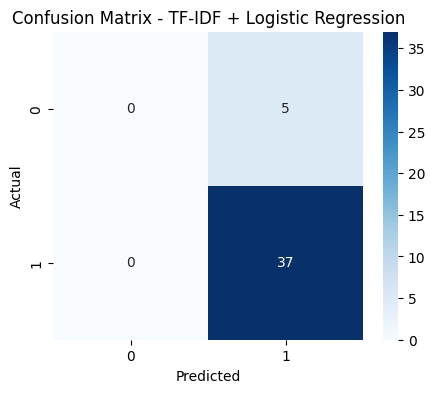

In [25]:
# Display the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TF-IDF + Logistic Regression")
plt.show()

## Stretch
Here we have used Logistic Regression, but other classification models such as Naive Bayes, Random Forest, or SVM, may perform better. Feel free to explore if you would like extra practice.

# Step 4: What did you observe? 

good accuracy, but not really useful because it's heavily biased due to biased data. 